## Spotify Recommender System

In [280]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import base64
import datetime
import urllib3
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

### First Look at Spotify API

Since this is the first time I am working with the Spotify API, I want to understand how it works and see data I can extract. We'll be using Spotipy which is a lightweight python library for the Spotify Web API.
If you are interested in this library, check out the documentation link: https://spotipy.readthedocs.io/en/2.18.0/
Also, two resources I used to extract the data were https://github.com/tgel0/spotify-data and https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6 . 

#### Spotipy

For the steps below, a spotify client id and a client secret are needed to access the API. It is an easy and quick process and can be done in the spotify for developers website:
https://developer.spotify.com/

In [281]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = "" #fill in with client_id
secret = "" #fill in with secret

auth_manager = SpotifyClientCredentials(client_id,secret)
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id = 'my_client_id', client_secret = 'my_client_secret'))

In [282]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

beatles_uri = 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, secret))

results = spotify.artist_albums(beatles_uri, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Abbey Road (Super Deluxe Edition)
The Beatles
Live At The Hollywood Bowl
Let It Be... Naked (Remastered)
Yellow Submarine Songtrack
On Air - Live At The BBC (Vol.2)
1 (Remastered)
Live At The BBC (Remastered)
Let It Be (Remastered)
Abbey Road (Remastered)
Yellow Submarine (Remastered)
The Beatles (Remastered)
Magical Mystery Tour (Remastered)
Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition)
Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition)
Sgt. Pepper's Lonely Hearts Club Band (Remastered)
Sgt. Pepper's Lonely Hearts Club Band (Super Deluxe Edition)
Revolver (Remastered)
Rubber Soul (Remastered)
Help! (Remastered)
Beatles For Sale (Remastered)
A Hard Day's Night (Remastered)
With The Beatles (Remastered)
Please Please Me (Remastered)


Ok, it seems to be working. We got the albums for the greatest band ever.

In [283]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

vintage_uri = 'spotify:artist:28uJnu5EsrGml2tBd7y8ts'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, secret))
results = spotify.artist_top_tracks(vintage_uri)

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    print('audio    : ' + track['preview_url'])
    print('cover art: ' + track['album']['images'][0]['url'])
    print()

track    : Slow Down (feat. Jorja Smith) - Vintage Culture & Slow Motion Remix
audio    : https://p.scdn.co/mp3-preview/5d009955039a908ca5738ed7c40f187a65281282?cid=944bef8f2c1c4093adccf168d5f5b578
cover art: https://i.scdn.co/image/ab67616d0000b273fb6906ff39ee5ec9f230e05d

track    : Love Tonight - Vintage Culture & Kiko Franco Remix Edit
audio    : https://p.scdn.co/mp3-preview/746240fb546b4963145bd365ed2b66ada742f828?cid=944bef8f2c1c4093adccf168d5f5b578
cover art: https://i.scdn.co/image/ab67616d0000b273be57a19f9e3e37235c94b25d

track    : I Will Find
audio    : https://p.scdn.co/mp3-preview/d02998733d7fe3c9e1d8943e4843a7e77eed911d?cid=944bef8f2c1c4093adccf168d5f5b578
cover art: https://i.scdn.co/image/ab67616d0000b2732ca8af29fe8b94af84957154

track    : Party On My Own (feat. FAULHABER)
audio    : https://p.scdn.co/mp3-preview/be1f58f475c90cfa57c5c444022bfc4a73ba2b63?cid=944bef8f2c1c4093adccf168d5f5b578
cover art: https://i.scdn.co/image/ab67616d0000b27377763f2e065b0a4ddb2fe098

tr

#### This is the picture of the playlist we will be working with

In [284]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, secret))

results = spotify.playlist_cover_image('spotify:playlist:6o2FRCMasnwcdNBQ6U762H')
results

[{'height': None,
  'url': 'https://i.scdn.co/image/ab67706c0000bebb5459fe47c8069c32e09912fd',
  'width': None}]

from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys
import pprint

if len(sys.argv) > 1:
    search_str = sys.argv[1]
else:
    search_str = 'The Beatles'

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id, secret))
result = sp.search(search_str)
pprint.pprint(result)

In [6]:
artist_name = []
track_name = []
popularity = []
track_id = []
release_date= []
genre= []

for i in range(0,1000,50):
    track_results = sp.search(q='year:2021', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        release_date.append(t["album"]['release_date'])
      


In [7]:
for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        release_date.append(t["album"]['release_date'])

In [9]:

for i in range(0,1000,50):
    track_results = sp.search(q='year:2019', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        release_date.append(t["album"]['release_date'])

In [10]:

for i in range(0,1000,50):
    track_results = sp.search(q='year:2018', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        release_date.append(t["album"]['release_date'])

In [11]:

for i in range(0,1000,50):
    track_results = sp.search(q='year:2017', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        release_date.append(t["album"]['release_date'])

In [12]:

for i in range(0,1000,50):
    track_results = sp.search(q='year:2016', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        release_date.append(t["album"]['release_date'])

In [16]:
df_tracks['release_date']

0       2021-05-21
1       2020-09-16
2       2021-07-02
3       2021-04-09
4       2015-03-31
           ...    
5995    2016-12-22
5996    2016-11-04
5997    2016-12-23
5998    2016-06-24
5999    2017-09-06
Name: release_date, Length: 6000, dtype: object

In [15]:
df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity,'release_date':release_date})
print(df_tracks.shape)
df_tracks.head()

(6000, 5)


,artist_name,track_name,track_id,popularity,release_date
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,100,2021-05-21
1,Schoolgirl Byebye,"Year,2015",0UsmyJDsst2xhX1ZiFF3JW,25,2020-09-16
2,Years & Years,King,4uaPh9n24VKMJMsvApyz2C,2,2021-07-02
3,Doja Cat,Kiss Me More (feat. SZA),748mdHapucXQri7IAO8yFK,97,2021-04-09
4,Anthem Lights,K-LOVE Fan Awards: Songs of the Year (2015 Mas...,5rJw9VsPNdfnV9Ar97xZG2,33,2015-03-31


In [23]:
df_tracks

,artist_name,track_name,track_id,popularity,release_date
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,100,2021-05-21
1,Schoolgirl Byebye,"Year,2015",0UsmyJDsst2xhX1ZiFF3JW,25,2020-09-16
2,Years & Years,King,4uaPh9n24VKMJMsvApyz2C,2,2021-07-02
3,Doja Cat,Kiss Me More (feat. SZA),748mdHapucXQri7IAO8yFK,97,2021-04-09
4,Anthem Lights,K-LOVE Fan Awards: Songs of the Year (2015 Mas...,5rJw9VsPNdfnV9Ar97xZG2,33,2015-03-31
...,...,...,...,...,...
5995,Armin van Buuren,A State Of Trance (ASOT 795) - 'A State Of Tra...,1GiCbfHJgWsJzwGefiGXKm,1,2016-12-22
5996,Luke Combs,I Know She Ain't Ready,0TQ9Hf5DwI9crGZSIlq445,61,2016-11-04
5997,The Busters,Busterlor - Live 2016,7wFFW325tv8je3L2scpnez,3,2016-12-23
5998,Cash Cash,Take Me Home (feat. Bebe Rexha),2zMXH5k5NZy1Nw460bLvRh,59,2016-06-24


In [25]:
genre = []
for artist in df_tracks['artist_name']:
    result = sp.search(artist)
    track = result['tracks']['items'][0]
    artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
    genre.append(artist["genres"])

In [26]:
df_tracks['genre']= genre

In [27]:
df_tracks

,artist_name,track_name,track_id,popularity,release_date,genre
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,100,2021-05-21,[pop]
1,Schoolgirl Byebye,"Year,2015",0UsmyJDsst2xhX1ZiFF3JW,25,2020-09-16,"[chinese indie, sinogaze, southern china indie]"
2,Years & Years,King,4uaPh9n24VKMJMsvApyz2C,2,2021-07-02,"[dance pop, electropop, gauze pop, pop, post-t..."
3,Doja Cat,Kiss Me More (feat. SZA),748mdHapucXQri7IAO8yFK,97,2021-04-09,"[dance pop, pop]"
4,Anthem Lights,K-LOVE Fan Awards: Songs of the Year (2015 Mas...,5rJw9VsPNdfnV9Ar97xZG2,33,2015-03-31,"[ccm, christian alternative rock, christian mu..."
...,...,...,...,...,...,...
5995,Armin van Buuren,A State Of Trance (ASOT 795) - 'A State Of Tra...,1GiCbfHJgWsJzwGefiGXKm,1,2016-12-22,"[dance pop, edm, electro house, pop, pop dance..."
5996,Luke Combs,I Know She Ain't Ready,0TQ9Hf5DwI9crGZSIlq445,61,2016-11-04,[contemporary country]
5997,The Busters,Busterlor - Live 2016,7wFFW325tv8je3L2scpnez,3,2016-12-23,"[euroska, german ska, ska, ska revival, tradit..."
5998,Cash Cash,Take Me Home (feat. Bebe Rexha),2zMXH5k5NZy1Nw460bLvRh,59,2016-06-24,"[modern rock, pop rap]"


In [28]:
df_tracks.to_csv('df_tracks.csv')

In [29]:
df_tracks['track_name'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997    False
5998    False
5999    False
Name: track_name, Length: 6000, dtype: bool

In [ ]:
df_tracks

In [30]:
df_tracks.sort_values('popularity', ascending=False).head(10)

,artist_name,track_name,track_id,popularity,release_date,genre
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,100,2021-05-21,[pop]
11,Lil Nas X,MONTERO (Call Me By Your Name),67BtfxlNbhBmCDR2L2l8qd,99,2021-03-31,"[lgbtq+ hip hop, pop rap]"
4000,Måneskin,Beggin',3Wrjm47oTz2sjIgck11l5e,98,2017-12-08,"[indie rock italiano, italian pop]"
50,Rauw Alejandro,Todo De Ti,4fSIb4hdOQ151TILNsSEaF,98,2021-05-20,"[puerto rican pop, trap latino]"
3,Doja Cat,Kiss Me More (feat. SZA),748mdHapucXQri7IAO8yFK,97,2021-04-09,"[dance pop, pop]"
35,Bad Bunny,Yonaguni,2JPLbjOn0wPCngEot2STUS,97,2021-06-04,"[latin, reggaeton, trap latino]"
27,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),4iJyoBOLtHqaGxP12qzhQI,97,2021-03-19,"[canadian pop, pop, post-teen pop]"
37,BTS,Butter,2bgTY4UwhfBYhGT4HUYStN,97,2021-06-04,"[k-pop, k-pop boy group]"
156,Måneskin,I WANNA BE YOUR SLAVE,4pt5fDVTg5GhEvEtlz9dKk,95,2021-03-19,"[indie rock italiano, italian pop]"
7,Olivia Rodrigo,traitor,5CZ40GBx1sQ9agT82CLQCT,95,2021-05-21,[pop]


In [ ]:
"danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]

In [69]:
audio =[]
for item in df_tracks['track_id']:
    result= spotify.audio_features(item)
    audio.append(result)

In [71]:
df_tracks['audio_features']= audio

In [72]:
df_tracks

,artist_name,track_name,track_id,popularity,release_date,genre,audio_features
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,100,2021-05-21,[pop],"[{'danceability': 0.563, 'energy': 0.664, 'key..."
1,Schoolgirl Byebye,"Year,2015",0UsmyJDsst2xhX1ZiFF3JW,25,2020-09-16,"[chinese indie, sinogaze, southern china indie]","[{'danceability': 0.314, 'energy': 0.0855, 'ke..."
2,Years & Years,King,4uaPh9n24VKMJMsvApyz2C,2,2021-07-02,"[dance pop, electropop, gauze pop, pop, post-t...","[{'danceability': 0.559, 'energy': 0.837, 'key..."
3,Doja Cat,Kiss Me More (feat. SZA),748mdHapucXQri7IAO8yFK,97,2021-04-09,"[dance pop, pop]","[{'danceability': 0.762, 'energy': 0.701, 'key..."
4,Anthem Lights,K-LOVE Fan Awards: Songs of the Year (2015 Mas...,5rJw9VsPNdfnV9Ar97xZG2,33,2015-03-31,"[ccm, christian alternative rock, christian mu...","[{'danceability': 0.39, 'energy': 0.455, 'key'..."
...,...,...,...,...,...,...,...
5995,Armin van Buuren,A State Of Trance (ASOT 795) - 'A State Of Tra...,1GiCbfHJgWsJzwGefiGXKm,1,2016-12-22,"[dance pop, edm, electro house, pop, pop dance...","[{'danceability': 0.389, 'energy': 0.829, 'key..."
5996,Luke Combs,I Know She Ain't Ready,0TQ9Hf5DwI9crGZSIlq445,61,2016-11-04,[contemporary country],"[{'danceability': 0.477, 'energy': 0.728, 'key..."
5997,The Busters,Busterlor - Live 2016,7wFFW325tv8je3L2scpnez,3,2016-12-23,"[euroska, german ska, ska, ska revival, tradit...","[{'danceability': 0.598, 'energy': 0.924, 'key..."
5998,Cash Cash,Take Me Home (feat. Bebe Rexha),2zMXH5k5NZy1Nw460bLvRh,59,2016-06-24,"[modern rock, pop rap]","[{'danceability': 0.571, 'energy': 0.903, 'key..."


In [73]:
df_tracks.to_csv('df_tracks_audio.csv')

In [131]:
df_tracks=df_tracks.drop(df_tracks.index[819])

In [136]:
df_tracks=df_tracks.drop(df_tracks.index[2984])

In [140]:
df_tracks=df_tracks.drop(df_tracks.index[3967])

In [145]:
df_tracks=df_tracks.drop(df_tracks.index[5635])

In [100]:
df_tracks['audio_features'][0][0]['danceability']

0.563

In [ ]:
"time_signature"]

In [147]:
danceability= []
for item in df_tracks['audio_features']:
    danceability.append((item[0]['danceability']))

In [146]:
energy= []
for item in df_tracks['audio_features']:
    energy.append((item[0]['energy']))

In [149]:
key= []
for item in df_tracks['audio_features']:
    key.append((item[0]['key']))

In [150]:
loudness= []
for item in df_tracks['audio_features']:
    loudness.append((item[0]['loudness']))

In [151]:
mode= []
for item in df_tracks['audio_features']:
    mode.append((item[0]['mode']))

In [152]:
speechiness= []
for item in df_tracks['audio_features']:
    speechiness.append((item[0]['speechiness']))

In [153]:
instrumentalness= []
for item in df_tracks['audio_features']:
    instrumentalness.append((item[0]['instrumentalness']))

In [154]:
liveness= []
for item in df_tracks['audio_features']:
    liveness.append((item[0]['liveness']))

In [155]:
valence= []
for item in df_tracks['audio_features']:
    valence.append((item[0]['valence']))

In [156]:
tempo= []
for item in df_tracks['audio_features']:
    tempo.append((item[0]['tempo']))

In [157]:
duration_ms= []
for item in df_tracks['audio_features']:
    duration_ms.append((item[0]['duration_ms']))

In [158]:
time_signature= []
for item in df_tracks['audio_features']:
    time_signature.append((item[0]['time_signature']))

In [161]:
df_tracks['danceability']=danceability

In [163]:
df_tracks['energy']=energy

In [164]:
df_tracks['key']=key

In [165]:
df_tracks['loudness']=loudness

In [166]:
df_tracks['mode']=mode

In [167]:
df_tracks['speechiness']=speechiness

In [168]:
df_tracks['instrumentalness']=instrumentalness

In [169]:
df_tracks['liveness']=liveness

In [170]:
df_tracks['valence']=valence

In [171]:
df_tracks['tempo']=tempo

In [172]:
df_tracks['duration_ms']=duration_ms

In [173]:
df_tracks['time_signature']=time_signature

In [203]:
df_tracks.head(20
              )

,artist_name,track_name,track_id,popularity,release_date,genre,audio_features,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,100,2021-05-21,[pop],"[{'danceability': 0.563, 'energy': 0.664, 'key...",0.5630,0.6640,9,-5.044,1,0.1540,0.000000,0.0849,0.6880,166.928,178147,4
1,Schoolgirl Byebye,"Year,2015",0UsmyJDsst2xhX1ZiFF3JW,25,2020-09-16,"[chinese indie, sinogaze, southern china indie]","[{'danceability': 0.314, 'energy': 0.0855, 'ke...",0.3140,0.0855,9,-15.775,1,0.0342,0.795000,0.1600,0.1610,69.893,74302,3
2,Years & Years,King,4uaPh9n24VKMJMsvApyz2C,2,2021-07-02,"[dance pop, electropop, gauze pop, pop, post-t...","[{'danceability': 0.559, 'energy': 0.837, 'key...",0.5590,0.8370,4,-4.062,0,0.0391,0.000000,0.3930,0.4460,119.958,214835,4
3,Doja Cat,Kiss Me More (feat. SZA),748mdHapucXQri7IAO8yFK,97,2021-04-09,"[dance pop, pop]","[{'danceability': 0.762, 'energy': 0.701, 'key...",0.7620,0.7010,8,-3.541,1,0.0286,0.000158,0.1230,0.7420,110.968,208867,4
4,Anthem Lights,K-LOVE Fan Awards: Songs of the Year (2015 Mas...,5rJw9VsPNdfnV9Ar97xZG2,33,2015-03-31,"[ccm, christian alternative rock, christian mu...","[{'danceability': 0.39, 'energy': 0.455, 'key'...",0.3900,0.4550,4,-4.247,1,0.0316,0.000000,0.1250,0.3580,107.012,182288,4
5,Satoshi Love,wish i dropped out like brakence interlude,7BFk1nSfwfkDOgnNNeY7Yn,0,2021-02-04,[japanese instrumental],"[{'danceability': 0.586, 'energy': 0.546, 'key...",0.5860,0.5460,7,-7.139,1,0.0871,0.220000,0.2180,0.4650,139.956,83000,4
6,Years & Years,Starstruck - Ofenbach Remix,3OgPaRi9rpspePjsjPupVd,0,2021-07-09,"[dance pop, electropop, gauze pop, pop, post-t...","[{'danceability': 0.787, 'energy': 0.818, 'key...",0.7870,0.8180,7,-4.978,1,0.0772,0.000052,0.0784,0.5240,119.998,156822,4
7,Olivia Rodrigo,traitor,5CZ40GBx1sQ9agT82CLQCT,95,2021-05-21,[pop],"[{'danceability': 0.38, 'energy': 0.339, 'key'...",0.3800,0.3390,3,-7.885,1,0.0338,0.000000,0.1200,0.0849,100.607,229227,4
8,Anthem Lights,K-Love Fan Awards: Songs of the Year (2014 Mas...,00ohIpPn9LkKpeIqhfIU9V,27,2014-03-04,"[ccm, christian alternative rock, christian mu...","[{'danceability': 0.42, 'energy': 0.281, 'key'...",0.4200,0.2810,11,-8.204,1,0.0334,0.000000,0.3760,0.2290,119.515,213165,4
9,Lady Gaga,Poker Face,4liFTpYparE2zEUp2GfG64,32,2020-10-23,"[dance pop, pop, post-teen pop]","[{'danceability': 0.851, 'energy': 0.818, 'key...",0.8510,0.8180,4,-4.637,1,0.0789,0.000003,0.0945,0.8080,119.006,238907,4


In [175]:
df_tracks.to_csv('df_tracks_final.csv')

In [228]:
df_tracks

,artist_name,track_name,track_id,popularity,release_date,genre,audio_features,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,100,2021-05-21,['pop'],"[{'danceability': 0.563, 'energy': 0.664, 'key...",0.563,0.6640,9,-5.044,1,0.1540,0.000000,0.0849,0.688,166.928,178147,4
1,Schoolgirl Byebye,"Year,2015",0UsmyJDsst2xhX1ZiFF3JW,25,2020-09-16,"['chinese indie', 'sinogaze', 'southern china ...","[{'danceability': 0.314, 'energy': 0.0855, 'ke...",0.314,0.0855,9,-15.775,1,0.0342,0.795000,0.1600,0.161,69.893,74302,3
2,Years & Years,King,4uaPh9n24VKMJMsvApyz2C,2,2021-07-02,"['dance pop', 'electropop', 'gauze pop', 'pop'...","[{'danceability': 0.559, 'energy': 0.837, 'key...",0.559,0.8370,4,-4.062,0,0.0391,0.000000,0.3930,0.446,119.958,214835,4
3,Doja Cat,Kiss Me More (feat. SZA),748mdHapucXQri7IAO8yFK,97,2021-04-09,"['dance pop', 'pop']","[{'danceability': 0.762, 'energy': 0.701, 'key...",0.762,0.7010,8,-3.541,1,0.0286,0.000158,0.1230,0.742,110.968,208867,4
4,Anthem Lights,K-LOVE Fan Awards: Songs of the Year (2015 Mas...,5rJw9VsPNdfnV9Ar97xZG2,33,2015-03-31,"['ccm', 'christian alternative rock', 'christi...","[{'danceability': 0.39, 'energy': 0.455, 'key'...",0.390,0.4550,4,-4.247,1,0.0316,0.000000,0.1250,0.358,107.012,182288,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,Armin van Buuren,A State Of Trance (ASOT 795) - 'A State Of Tra...,1GiCbfHJgWsJzwGefiGXKm,1,2016-12-22,"['dance pop', 'edm', 'electro house', 'pop', '...","[{'danceability': 0.389, 'energy': 0.829, 'key...",0.389,0.8290,8,-6.449,1,0.3990,0.000000,0.2130,0.623,141.326,56387,3
5992,Luke Combs,I Know She Ain't Ready,0TQ9Hf5DwI9crGZSIlq445,61,2016-11-04,['contemporary country'],"[{'danceability': 0.477, 'energy': 0.728, 'key...",0.477,0.7280,8,-5.975,1,0.0337,0.000000,0.1010,0.613,162.084,184747,4
5993,The Busters,Busterlor - Live 2016,7wFFW325tv8je3L2scpnez,3,2016-12-23,"['euroska', 'german ska', 'ska', 'ska revival'...","[{'danceability': 0.598, 'energy': 0.924, 'key...",0.598,0.9240,7,-4.862,1,0.0564,0.000196,0.9690,0.886,118.303,196653,4
5994,Cash Cash,Take Me Home (feat. Bebe Rexha),2zMXH5k5NZy1Nw460bLvRh,59,2016-06-24,"['modern rock', 'pop rap']","[{'danceability': 0.571, 'energy': 0.903, 'key...",0.571,0.9030,7,-2.184,1,0.2140,0.000001,0.1860,0.477,127.951,206320,4


In [270]:
df_tracks['genre']=df_tracks['genre'].apply(lambda y: np.nan if len(y)==0 else y)

0                                               ['pop']
1     ['chinese indie', 'sinogaze', 'southern china ...
2     ['dance pop', 'electropop', 'gauze pop', 'pop'...
3                                  ['dance pop', 'pop']
4     ['ccm', 'christian alternative rock', 'christi...
5                             ['japanese instrumental']
6     ['dance pop', 'electropop', 'gauze pop', 'pop'...
7                                               ['pop']
8     ['ccm', 'christian alternative rock', 'christi...
9                 ['dance pop', 'pop', 'post-teen pop']
10    ['alternative metal', 'nu metal', 'rap metal',...
11                        ['lgbtq+ hip hop', 'pop rap']
12                     ['lo-fi beats', 'lo-fi jazzhop']
13                       ['chicago rap', 'melodic rap']
14                                                   []
Name: genre, dtype: object

In [302]:
final1=df_tracks[df_tracks['genre']!='[]']

In [303]:
final1.to_csv('df_tracks_final_1.csv')

In [319]:
final1['new_genre']=final1['genre'].apply(lambda x:x.split("'")[1])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [321]:
final1.to_csv('df_tracks_final_1.csv')

In [328]:
final1['release_date'].apply(lambda x:x.split("-")[0])

0       2021
1       2020
2       2021
3       2021
4       2015
        ... 
5991    2016
5992    2016
5993    2016
5994    2016
5995    2017
Name: release_date, Length: 5311, dtype: object

In [329]:
final1['release_year']=final1['release_date'].apply(lambda x:x.split("-")[0])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [331]:
final1.to_csv('df_tracks_final_1.csv')

In [344]:
final1

,artist_name,track_name,track_id,popularity,release_date,genre,audio_features,danceability,energy,key,...,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,new_genre,release_year
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,100,2021-05-21,['pop'],"[{'danceability': 0.563, 'energy': 0.664, 'key...",0.563,0.6640,9,...,1,0.1540,0.000000,0.0849,0.688,166.928,178147,4,pop,2021
1,Schoolgirl Byebye,"Year,2015",0UsmyJDsst2xhX1ZiFF3JW,25,2020-09-16,"['chinese indie', 'sinogaze', 'southern china ...","[{'danceability': 0.314, 'energy': 0.0855, 'ke...",0.314,0.0855,9,...,1,0.0342,0.795000,0.1600,0.161,69.893,74302,3,chinese indie,2020
2,Years & Years,King,4uaPh9n24VKMJMsvApyz2C,2,2021-07-02,"['dance pop', 'electropop', 'gauze pop', 'pop'...","[{'danceability': 0.559, 'energy': 0.837, 'key...",0.559,0.8370,4,...,0,0.0391,0.000000,0.3930,0.446,119.958,214835,4,dance pop,2021
3,Doja Cat,Kiss Me More (feat. SZA),748mdHapucXQri7IAO8yFK,97,2021-04-09,"['dance pop', 'pop']","[{'danceability': 0.762, 'energy': 0.701, 'key...",0.762,0.7010,8,...,1,0.0286,0.000158,0.1230,0.742,110.968,208867,4,dance pop,2021
4,Anthem Lights,K-LOVE Fan Awards: Songs of the Year (2015 Mas...,5rJw9VsPNdfnV9Ar97xZG2,33,2015-03-31,"['ccm', 'christian alternative rock', 'christi...","[{'danceability': 0.39, 'energy': 0.455, 'key'...",0.390,0.4550,4,...,1,0.0316,0.000000,0.1250,0.358,107.012,182288,4,ccm,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,Armin van Buuren,A State Of Trance (ASOT 795) - 'A State Of Tra...,1GiCbfHJgWsJzwGefiGXKm,1,2016-12-22,"['dance pop', 'edm', 'electro house', 'pop', '...","[{'danceability': 0.389, 'energy': 0.829, 'key...",0.389,0.8290,8,...,1,0.3990,0.000000,0.2130,0.623,141.326,56387,3,dance pop,2016
5992,Luke Combs,I Know She Ain't Ready,0TQ9Hf5DwI9crGZSIlq445,61,2016-11-04,['contemporary country'],"[{'danceability': 0.477, 'energy': 0.728, 'key...",0.477,0.7280,8,...,1,0.0337,0.000000,0.1010,0.613,162.084,184747,4,contemporary country,2016
5993,The Busters,Busterlor - Live 2016,7wFFW325tv8je3L2scpnez,3,2016-12-23,"['euroska', 'german ska', 'ska', 'ska revival'...","[{'danceability': 0.598, 'energy': 0.924, 'key...",0.598,0.9240,7,...,1,0.0564,0.000196,0.9690,0.886,118.303,196653,4,euroska,2016
5994,Cash Cash,Take Me Home (feat. Bebe Rexha),2zMXH5k5NZy1Nw460bLvRh,59,2016-06-24,"['modern rock', 'pop rap']","[{'danceability': 0.571, 'energy': 0.903, 'key...",0.571,0.9030,7,...,1,0.2140,0.000001,0.1860,0.477,127.951,206320,4,modern rock,2016


spotify:playlist:6o2FRCMasnwcdNBQ6U762H

In [285]:
sp.user_playlist_tracks("boben47", "spotify:playlist:6o2FRCMasnwcdNBQ6U762H")

{'href': 'https://api.spotify.com/v1/playlists/6o2FRCMasnwcdNBQ6U762H/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2020-07-14T00:22:03Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/sinenthe'},
    'href': 'https://api.spotify.com/v1/users/sinenthe',
    'id': 'sinenthe',
    'type': 'user',
    'uri': 'spotify:user:sinenthe'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'album',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6TgVQhHx0BWvzdEQxRnr23'},
       'href': 'https://api.spotify.com/v1/artists/6TgVQhHx0BWvzdEQxRnr23',
       'id': '6TgVQhHx0BWvzdEQxRnr23',
       'name': 'POLLO',
       'type': 'artist',
       'uri': 'spotify:artist:6TgVQhHx0BWvzdEQxRnr23'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE

In [286]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id",'popularity','release_date',"danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        playlist_features["popularity"] = track["track"]["popularity"]
        playlist_features['release_date'] = track["track"]["album"]['release_date']
        
    
    
        # Audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[6:]:
            playlist_features[feature] = audio_features[feature]  
        
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

In [287]:
df=analyze_playlist("boben47", "spotify:playlist:6o2FRCMasnwcdNBQ6U762H")

In [288]:
df

,artist,album,track_name,track_id,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,POLLO,Vim pra Dominar o Mundo,Vagalumes,77Ztfd0fzBA9sPJNVmvyGF,57,2012-12-07,0.803,0.7500,11,-4.640,1,0.2460,0,0.1340,0.7150,87.992,169920,4
1,Kurt Hugo Schneider,Just A Dream,Just A Dream,0QfmQhr5npxuWQ4zzUDUhB,68,2017-11-14,0.439,0.7510,9,-7.632,1,0.0527,4.61e-05,0.0577,0.2210,164.103,263598,4
2,Ariana Grande,"thank u, next",needy,1TEL6MlSSVLSdhOSddidlJ,71,2019-02-08,0.647,0.3090,7,-7.948,0,0.0366,7.41e-06,0.2020,0.1950,87.045,171573,4
3,Various Artists,The Greatest Showman (Original Motion Picture ...,Rewrite The Stars,65fpYBrI8o2cfrwf2US4gq,75,2017-12-08,0.684,0.6190,10,-7.005,1,0.0386,0,0.1220,0.2840,125.046,217440,4
4,Various Artists,The Greatest Showman (Original Motion Picture ...,A Million Dreams,0RoA7ObU6phWpqhlC9zH4Z,74,2017-12-08,0.265,0.3120,7,-11.689,1,0.0569,0,0.0893,0.0998,54.747,269453,3
5,Various Artists,The Greatest Showman (Original Motion Picture ...,Tightrope,0GVuLQtPXFaL18ijEOqoAa,68,2017-12-08,0.351,0.3310,9,-10.316,1,0.0382,9.14e-06,0.0919,0.1910,161.564,234360,3
6,Haley Reinhart,Better,Can't Help Falling in Love,6yIHGmQLJxWAUZ1ZkENemN,71,2016-04-29,0.410,0.0485,0,-13.918,1,0.0380,0,0.1080,0.2470,137.970,173175,4
7,One Direction,Midnight Memories (Deluxe),You & I,2afCBiru10AFckfOa49wIa,77,2013-11-25,0.574,0.3290,1,-6.829,1,0.0274,0,0.0986,0.3560,130.993,237933,4
8,Shawn Mendes,Señorita,Señorita,0TK2YIli7K1leLovkQiNik,83,2019-06-21,0.759,0.5400,9,-6.039,0,0.0287,0,0.0945,0.7500,116.947,190960,4
9,Avril Lavigne,The Best Damn Thing (Expanded Edition),Girlfriend,45hOioMDJktr86iKDHC8gr,76,2007-04-17,0.560,0.9590,7,-2.433,1,0.1020,0.000221,0.2090,0.6690,163.983,216600,4


In [289]:
df["popularity"] = df["popularity"].astype(float)

In [290]:
df.head()

,artist,album,track_name,track_id,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,POLLO,Vim pra Dominar o Mundo,Vagalumes,77Ztfd0fzBA9sPJNVmvyGF,57.0,2012-12-07,0.803,0.750,11,-4.640,1,0.2460,0,0.1340,0.7150,87.992,169920,4
1,Kurt Hugo Schneider,Just A Dream,Just A Dream,0QfmQhr5npxuWQ4zzUDUhB,68.0,2017-11-14,0.439,0.751,9,-7.632,1,0.0527,4.61e-05,0.0577,0.2210,164.103,263598,4
2,Ariana Grande,"thank u, next",needy,1TEL6MlSSVLSdhOSddidlJ,71.0,2019-02-08,0.647,0.309,7,-7.948,0,0.0366,7.41e-06,0.2020,0.1950,87.045,171573,4
3,Various Artists,The Greatest Showman (Original Motion Picture ...,Rewrite The Stars,65fpYBrI8o2cfrwf2US4gq,75.0,2017-12-08,0.684,0.619,10,-7.005,1,0.0386,0,0.1220,0.2840,125.046,217440,4
4,Various Artists,The Greatest Showman (Original Motion Picture ...,A Million Dreams,0RoA7ObU6phWpqhlC9zH4Z,74.0,2017-12-08,0.265,0.312,7,-11.689,1,0.0569,0,0.0893,0.0998,54.747,269453,3


In [ ]:
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

def get_genre(artist):
    genre = []
    for artist in artist:
        result = sp.search(artist)
        track = result['tracks']['items'][0]
        artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
        genre.append(artist["genres"])

In [291]:
genre = []
for artist in df['artist']:
    result = sp.search(artist)
    track = result['tracks']['items'][0]
    artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
    genre.append(artist["genres"])

In [292]:
genre

[['latin hip hop', 'mexican hip hop'],
 ['channel pop', 'indie cafe pop', 'pop', 'post-teen pop', 'viral pop'],
 ['canadian contemporary r&b', 'canadian pop', 'pop'],
 ['classic rock',
  'folk',
  'folk rock',
  'mellow gold',
  'rock',
  'roots rock',
  'singer-songwriter',
  'soft rock'],
 ['classic rock',
  'folk',
  'folk rock',
  'mellow gold',
  'rock',
  'roots rock',
  'singer-songwriter',
  'soft rock'],
 ['classic rock',
  'folk',
  'folk rock',
  'mellow gold',
  'rock',
  'roots rock',
  'singer-songwriter',
  'soft rock'],
 ['idol'],
 ['boy band', 'pop', 'post-teen pop', 'talent show'],
 ['canadian pop', 'dance pop', 'pop', 'post-teen pop', 'viral pop'],
 ['canadian pop', 'candy pop', 'dance pop', 'pop', 'post-teen pop'],
 ['k-pop', 'k-pop boy group'],
 ['brostep', 'edm', 'pop', 'pop dance', 'progressive electro house'],
 ['dance pop', 'pop', 'post-teen pop'],
 ['classic rock',
  'folk',
  'folk rock',
  'mellow gold',
  'rock',
  'roots rock',
  'singer-songwriter',
  'so

In [332]:
df['genre']= genre

In [333]:
df

,artist,album,track_name,track_id,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,POLLO,Vim pra Dominar o Mundo,Vagalumes,77Ztfd0fzBA9sPJNVmvyGF,57.0,2012-12-07,0.803,0.7500,11,-4.640,1,0.2460,0,0.1340,0.7150,87.992,169920,4,"[latin hip hop, mexican hip hop]"
1,Kurt Hugo Schneider,Just A Dream,Just A Dream,0QfmQhr5npxuWQ4zzUDUhB,68.0,2017-11-14,0.439,0.7510,9,-7.632,1,0.0527,4.61e-05,0.0577,0.2210,164.103,263598,4,"[channel pop, indie cafe pop, pop, post-teen p..."
2,Ariana Grande,"thank u, next",needy,1TEL6MlSSVLSdhOSddidlJ,71.0,2019-02-08,0.647,0.3090,7,-7.948,0,0.0366,7.41e-06,0.2020,0.1950,87.045,171573,4,"[canadian contemporary r&b, canadian pop, pop]"
3,Various Artists,The Greatest Showman (Original Motion Picture ...,Rewrite The Stars,65fpYBrI8o2cfrwf2US4gq,75.0,2017-12-08,0.684,0.6190,10,-7.005,1,0.0386,0,0.1220,0.2840,125.046,217440,4,"[classic rock, folk, folk rock, mellow gold, r..."
4,Various Artists,The Greatest Showman (Original Motion Picture ...,A Million Dreams,0RoA7ObU6phWpqhlC9zH4Z,74.0,2017-12-08,0.265,0.3120,7,-11.689,1,0.0569,0,0.0893,0.0998,54.747,269453,3,"[classic rock, folk, folk rock, mellow gold, r..."
5,Various Artists,The Greatest Showman (Original Motion Picture ...,Tightrope,0GVuLQtPXFaL18ijEOqoAa,68.0,2017-12-08,0.351,0.3310,9,-10.316,1,0.0382,9.14e-06,0.0919,0.1910,161.564,234360,3,"[classic rock, folk, folk rock, mellow gold, r..."
6,Haley Reinhart,Better,Can't Help Falling in Love,6yIHGmQLJxWAUZ1ZkENemN,71.0,2016-04-29,0.410,0.0485,0,-13.918,1,0.0380,0,0.1080,0.2470,137.970,173175,4,[idol]
7,One Direction,Midnight Memories (Deluxe),You & I,2afCBiru10AFckfOa49wIa,77.0,2013-11-25,0.574,0.3290,1,-6.829,1,0.0274,0,0.0986,0.3560,130.993,237933,4,"[boy band, pop, post-teen pop, talent show]"
8,Shawn Mendes,Señorita,Señorita,0TK2YIli7K1leLovkQiNik,83.0,2019-06-21,0.759,0.5400,9,-6.039,0,0.0287,0,0.0945,0.7500,116.947,190960,4,"[canadian pop, dance pop, pop, post-teen pop, ..."
9,Avril Lavigne,The Best Damn Thing (Expanded Edition),Girlfriend,45hOioMDJktr86iKDHC8gr,76.0,2007-04-17,0.560,0.9590,7,-2.433,1,0.1020,0.000221,0.2090,0.6690,163.983,216600,4,"[canadian pop, candy pop, dance pop, pop, post..."


In [334]:
df['genre'][39]=['television']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [335]:
df['genre'][40]=['television']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [336]:
new=[]
for item in df['genre']:
    item[0]
    new.append(item[0])

In [337]:
df['genre']

0                      [latin hip hop, mexican hip hop]
1     [channel pop, indie cafe pop, pop, post-teen p...
2        [canadian contemporary r&b, canadian pop, pop]
3     [classic rock, folk, folk rock, mellow gold, r...
4     [classic rock, folk, folk rock, mellow gold, r...
5     [classic rock, folk, folk rock, mellow gold, r...
6                                                [idol]
7           [boy band, pop, post-teen pop, talent show]
8     [canadian pop, dance pop, pop, post-teen pop, ...
9     [canadian pop, candy pop, dance pop, pop, post...
10                             [k-pop, k-pop boy group]
11    [brostep, edm, pop, pop dance, progressive ele...
12                      [dance pop, pop, post-teen pop]
13    [classic rock, folk, folk rock, mellow gold, r...
14                                              [k-pop]
15      [dance rock, modern rock, permanent wave, rock]
16    [beatlesque, british invasion, classic rock, m...
17    [beatlesque, british invasion, classic roc

In [338]:
df['new_genre']= new

In [339]:
df

,artist,album,track_name,track_id,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,new_genre
0,POLLO,Vim pra Dominar o Mundo,Vagalumes,77Ztfd0fzBA9sPJNVmvyGF,57.0,2012-12-07,0.803,0.7500,11,-4.640,1,0.2460,0,0.1340,0.7150,87.992,169920,4,"[latin hip hop, mexican hip hop]",latin hip hop
1,Kurt Hugo Schneider,Just A Dream,Just A Dream,0QfmQhr5npxuWQ4zzUDUhB,68.0,2017-11-14,0.439,0.7510,9,-7.632,1,0.0527,4.61e-05,0.0577,0.2210,164.103,263598,4,"[channel pop, indie cafe pop, pop, post-teen p...",channel pop
2,Ariana Grande,"thank u, next",needy,1TEL6MlSSVLSdhOSddidlJ,71.0,2019-02-08,0.647,0.3090,7,-7.948,0,0.0366,7.41e-06,0.2020,0.1950,87.045,171573,4,"[canadian contemporary r&b, canadian pop, pop]",canadian contemporary r&b
3,Various Artists,The Greatest Showman (Original Motion Picture ...,Rewrite The Stars,65fpYBrI8o2cfrwf2US4gq,75.0,2017-12-08,0.684,0.6190,10,-7.005,1,0.0386,0,0.1220,0.2840,125.046,217440,4,"[classic rock, folk, folk rock, mellow gold, r...",classic rock
4,Various Artists,The Greatest Showman (Original Motion Picture ...,A Million Dreams,0RoA7ObU6phWpqhlC9zH4Z,74.0,2017-12-08,0.265,0.3120,7,-11.689,1,0.0569,0,0.0893,0.0998,54.747,269453,3,"[classic rock, folk, folk rock, mellow gold, r...",classic rock
5,Various Artists,The Greatest Showman (Original Motion Picture ...,Tightrope,0GVuLQtPXFaL18ijEOqoAa,68.0,2017-12-08,0.351,0.3310,9,-10.316,1,0.0382,9.14e-06,0.0919,0.1910,161.564,234360,3,"[classic rock, folk, folk rock, mellow gold, r...",classic rock
6,Haley Reinhart,Better,Can't Help Falling in Love,6yIHGmQLJxWAUZ1ZkENemN,71.0,2016-04-29,0.410,0.0485,0,-13.918,1,0.0380,0,0.1080,0.2470,137.970,173175,4,[idol],idol
7,One Direction,Midnight Memories (Deluxe),You & I,2afCBiru10AFckfOa49wIa,77.0,2013-11-25,0.574,0.3290,1,-6.829,1,0.0274,0,0.0986,0.3560,130.993,237933,4,"[boy band, pop, post-teen pop, talent show]",boy band
8,Shawn Mendes,Señorita,Señorita,0TK2YIli7K1leLovkQiNik,83.0,2019-06-21,0.759,0.5400,9,-6.039,0,0.0287,0,0.0945,0.7500,116.947,190960,4,"[canadian pop, dance pop, pop, post-teen pop, ...",canadian pop
9,Avril Lavigne,The Best Damn Thing (Expanded Edition),Girlfriend,45hOioMDJktr86iKDHC8gr,76.0,2007-04-17,0.560,0.9590,7,-2.433,1,0.1020,0.000221,0.2090,0.6690,163.983,216600,4,"[canadian pop, candy pop, dance pop, pop, post...",canadian pop


In [340]:
df['release_year']= df['release_date'].apply(lambda x:x.split('-')[0])

In [341]:
df['release_year']=pd.to_numeric(df['release_year'])

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            43 non-null     object 
 1   album             43 non-null     object 
 2   track_name        43 non-null     object 
 3   track_id          43 non-null     object 
 4   popularity        43 non-null     float64
 5   release_date      43 non-null     object 
 6   danceability      43 non-null     float64
 7   energy            43 non-null     float64
 8   key               43 non-null     object 
 9   loudness          43 non-null     float64
 10  mode              43 non-null     object 
 11  speechiness       43 non-null     float64
 12  instrumentalness  43 non-null     object 
 13  liveness          43 non-null     float64
 14  valence           43 non-null     float64
 15  tempo             43 non-null     float64
 16  duration_ms       43 non-null     object 
 17 

In [343]:
df.to_csv('playlist_final.csv')

Finally, after much effort, I think we have a dataset to work with!

### EDA

In [717]:
df.head()

,artist,album,track_name,track_id,popularity,release_date,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,new_genre,release_year
0,POLLO,Vim pra Dominar o Mundo,Vagalumes,77Ztfd0fzBA9sPJNVmvyGF,57.0,2012-12-07,0.803,0.750,11,-4.640,1,0.2460,0,0.1340,0.7150,87.992,169920,4,"[latin hip hop, mexican hip hop]",latin hip hop,2012
1,Kurt Hugo Schneider,Just A Dream,Just A Dream,0QfmQhr5npxuWQ4zzUDUhB,68.0,2017-11-14,0.439,0.751,9,-7.632,1,0.0527,4.61e-05,0.0577,0.2210,164.103,263598,4,"[channel pop, indie cafe pop, pop, post-teen p...",channel pop,2017
2,Ariana Grande,"thank u, next",needy,1TEL6MlSSVLSdhOSddidlJ,71.0,2019-02-08,0.647,0.309,7,-7.948,0,0.0366,7.41e-06,0.2020,0.1950,87.045,171573,4,"[canadian contemporary r&b, canadian pop, pop]",canadian contemporary r&b,2019
3,Various Artists,The Greatest Showman (Original Motion Picture ...,Rewrite The Stars,65fpYBrI8o2cfrwf2US4gq,75.0,2017-12-08,0.684,0.619,10,-7.005,1,0.0386,0,0.1220,0.2840,125.046,217440,4,"[classic rock, folk, folk rock, mellow gold, r...",classic rock,2017
4,Various Artists,The Greatest Showman (Original Motion Picture ...,A Million Dreams,0RoA7ObU6phWpqhlC9zH4Z,74.0,2017-12-08,0.265,0.312,7,-11.689,1,0.0569,0,0.0893,0.0998,54.747,269453,3,"[classic rock, folk, folk rock, mellow gold, r...",classic rock,2017


In [718]:
df1= df.drop(['release_date','genre'], axis=1)

In [719]:
df1.head()

,artist,album,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,new_genre,release_year
0,POLLO,Vim pra Dominar o Mundo,Vagalumes,77Ztfd0fzBA9sPJNVmvyGF,57.0,0.803,0.750,11,-4.640,1,0.2460,0,0.1340,0.7150,87.992,169920,4,latin hip hop,2012
1,Kurt Hugo Schneider,Just A Dream,Just A Dream,0QfmQhr5npxuWQ4zzUDUhB,68.0,0.439,0.751,9,-7.632,1,0.0527,4.61e-05,0.0577,0.2210,164.103,263598,4,channel pop,2017
2,Ariana Grande,"thank u, next",needy,1TEL6MlSSVLSdhOSddidlJ,71.0,0.647,0.309,7,-7.948,0,0.0366,7.41e-06,0.2020,0.1950,87.045,171573,4,canadian contemporary r&b,2019
3,Various Artists,The Greatest Showman (Original Motion Picture ...,Rewrite The Stars,65fpYBrI8o2cfrwf2US4gq,75.0,0.684,0.619,10,-7.005,1,0.0386,0,0.1220,0.2840,125.046,217440,4,classic rock,2017
4,Various Artists,The Greatest Showman (Original Motion Picture ...,A Million Dreams,0RoA7ObU6phWpqhlC9zH4Z,74.0,0.265,0.312,7,-11.689,1,0.0569,0,0.0893,0.0998,54.747,269453,3,classic rock,2017


In [720]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            43 non-null     object 
 1   album             43 non-null     object 
 2   track_name        43 non-null     object 
 3   track_id          43 non-null     object 
 4   popularity        43 non-null     float64
 5   danceability      43 non-null     float64
 6   energy            43 non-null     float64
 7   key               43 non-null     object 
 8   loudness          43 non-null     float64
 9   mode              43 non-null     object 
 10  speechiness       43 non-null     float64
 11  instrumentalness  43 non-null     object 
 12  liveness          43 non-null     float64
 13  valence           43 non-null     float64
 14  tempo             43 non-null     float64
 15  duration_ms       43 non-null     object 
 16  time_signature    43 non-null     object 
 17 

In [721]:
df.describe()

,popularity,danceability,energy,loudness,speechiness,liveness,valence,tempo,release_year
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,64.767442,0.588674,0.610105,-7.387093,0.070219,0.143440,0.474274,122.201140,2010.674419
std,16.310729,0.136887,0.222985,3.322088,0.072353,0.095792,0.239848,30.103429,15.782330
min,5.000000,0.265000,0.048500,-15.892000,0.027000,0.048100,0.099800,54.747000,1965.000000
25%,58.000000,0.461000,0.420000,-8.977500,0.034300,0.097600,0.265500,99.476000,2012.500000
50%,68.000000,0.638000,0.619000,-6.510000,0.043100,0.120000,0.442000,124.053000,2017.000000
75%,75.000000,0.688500,0.765500,-4.903500,0.063000,0.151500,0.658000,143.747500,2019.000000
max,88.000000,0.803000,0.979000,-2.433000,0.360000,0.595000,0.927000,171.966000,2021.000000


#### Correlation

<AxesSubplot:>

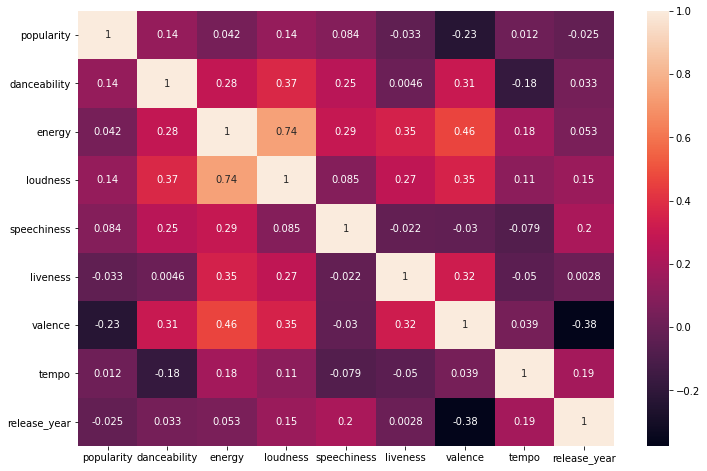

In [722]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)


Ok, so loudness and energy have a strong correlation. I guess it makes sense.

<AxesSubplot:xlabel='release_year', ylabel='count'>

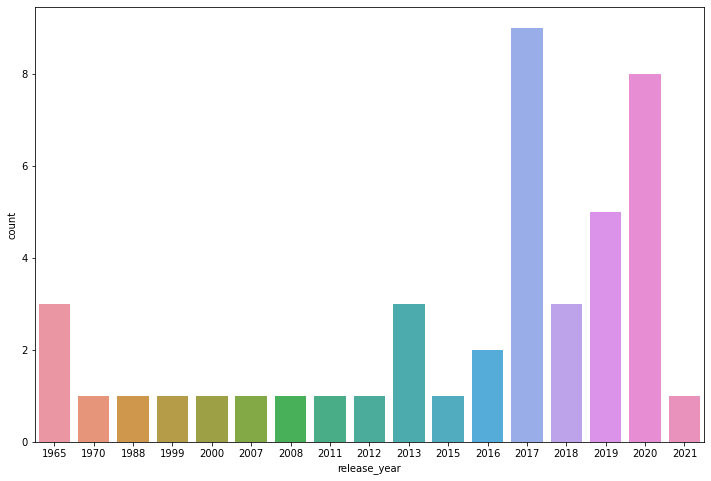

In [723]:
plt.figure(figsize=(12,8))
sns.countplot(data= df1, x= 'release_year')

<AxesSubplot:xlabel='new_genre', ylabel='count'>

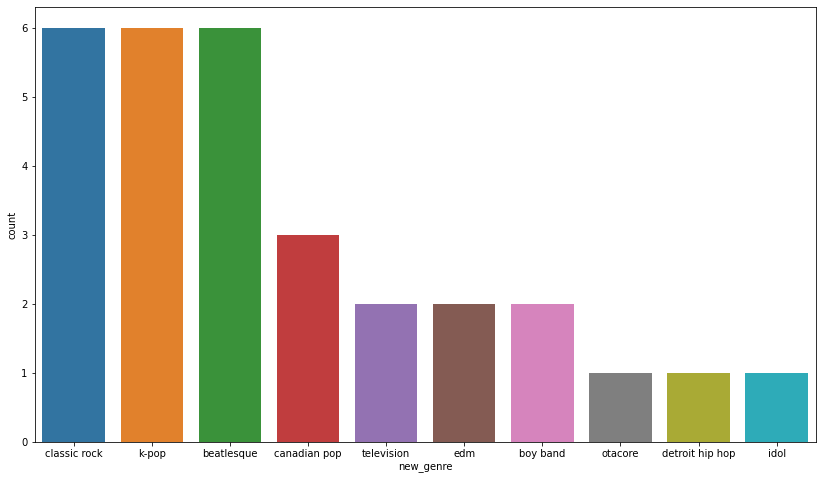

In [724]:
plt.figure(figsize=(14,8))
sns.countplot(data= df1, x= 'new_genre',order=pd.value_counts(df1['new_genre']).iloc[:10].index)

In [725]:
df1.new_genre.value_counts()

classic rock                 6
k-pop                        6
beatlesque                   6
canadian pop                 3
television                   2
edm                          2
boy band                     2
otacore                      1
detroit hip hop              1
idol                         1
sertanejo                    1
background piano             1
contemporary country         1
latin hip hop                1
anime                        1
channel pop                  1
ambient pop                  1
brostep                      1
dance pop                    1
modern alternative rock      1
dance rock                   1
canadian contemporary r&b    1
chill r&b                    1
Name: new_genre, dtype: int64

#### Top 5 most danceable songs

In [726]:
df1.sort_values('danceability', ascending=False)[:5]

,artist,album,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,new_genre,release_year
0,POLLO,Vim pra Dominar o Mundo,Vagalumes,77Ztfd0fzBA9sPJNVmvyGF,57.0,0.803,0.750,11,-4.640,1,0.2460,0,0.1340,0.715,87.992,169920,4,latin hip hop,2012
11,Marshmello,Here With Me,Here With Me,5icOoE6VgqFKohjWWNp0Ac,75.0,0.791,0.565,5,-3.933,0,0.0439,0,0.1560,0.181,99.961,156347,4,brostep,2019
8,Shawn Mendes,Señorita,Señorita,0TK2YIli7K1leLovkQiNik,83.0,0.759,0.540,9,-6.039,0,0.0287,0,0.0945,0.750,116.947,190960,4,canadian pop,2019
28,BTS,Dynamite,Dynamite,0v1x6rN6JHRapa03JElljE,5.0,0.746,0.765,6,-4.410,0,0.0993,0,0.0936,0.737,114.044,199054,4,k-pop,2020
14,SHAUN,Take,Way Back Home,3NxuezMdSLgt4OwHzBoUhL,72.0,0.745,0.739,10,-4.591,1,0.0327,0.000183,0.1270,0.556,99.913,214137,4,k-pop,2018


I guess Vagalumes is the most danceable(?) song in this playlist. The thing is, I have no idea what it means for a song to have a high danceability haha

#### Top 5 most popular songs

In [727]:
df1.sort_values('popularity'
                , ascending=False)[:5]

,artist,album,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,new_genre,release_year
23,The Neighbourhood,I Love You.,Sweater Weather,2QjOHCTQ1Jl3zawyYOpxh6,88.0,0.612,0.807,10,-2.810,1,0.0336,0.0177,0.1010,0.398,124.053,240400,4,modern alternative rock,2013
36,Israel & Rodolffo,"Aqui e Agora, Vol.1 (Ao Vivo)",Batom de Cereja - Ao Vivo,2MZQAvsA7aZDssppBLRxYp,85.0,0.606,0.908,6,-6.201,0,0.0565,0,0.1900,0.798,171.966,140942,4,sertanejo,2021
8,Shawn Mendes,Señorita,Señorita,0TK2YIli7K1leLovkQiNik,83.0,0.759,0.540,9,-6.039,0,0.0287,0,0.0945,0.750,116.947,190960,4,canadian pop,2019
33,Justin Bieber,Holy,Holy (feat. Chance The Rapper),5u1n1kITHCxxp8twBcZxWy,82.0,0.673,0.704,6,-8.056,1,0.3600,0,0.0898,0.372,86.919,212093,4,canadian pop,2020
26,Backstreet Boys,Millennium,I Want It That Way,47BBI51FKFwOMlIiX6m8ya,79.0,0.689,0.694,6,-5.830,0,0.0270,0,0.1480,0.482,99.039,213307,4,boy band,1999


Batom de Cereja was a big hit back in the Big Brother Brasil edition of this year. If I remember correctly, it was in the top charts on spotify for quite a while.

In [728]:
df1.head()

,artist,album,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,new_genre,release_year
0,POLLO,Vim pra Dominar o Mundo,Vagalumes,77Ztfd0fzBA9sPJNVmvyGF,57.0,0.803,0.750,11,-4.640,1,0.2460,0,0.1340,0.7150,87.992,169920,4,latin hip hop,2012
1,Kurt Hugo Schneider,Just A Dream,Just A Dream,0QfmQhr5npxuWQ4zzUDUhB,68.0,0.439,0.751,9,-7.632,1,0.0527,4.61e-05,0.0577,0.2210,164.103,263598,4,channel pop,2017
2,Ariana Grande,"thank u, next",needy,1TEL6MlSSVLSdhOSddidlJ,71.0,0.647,0.309,7,-7.948,0,0.0366,7.41e-06,0.2020,0.1950,87.045,171573,4,canadian contemporary r&b,2019
3,Various Artists,The Greatest Showman (Original Motion Picture ...,Rewrite The Stars,65fpYBrI8o2cfrwf2US4gq,75.0,0.684,0.619,10,-7.005,1,0.0386,0,0.1220,0.2840,125.046,217440,4,classic rock,2017
4,Various Artists,The Greatest Showman (Original Motion Picture ...,A Million Dreams,0RoA7ObU6phWpqhlC9zH4Z,74.0,0.265,0.312,7,-11.689,1,0.0569,0,0.0893,0.0998,54.747,269453,3,classic rock,2017


In [729]:
df1.mean()

popularity              64.767442
danceability             0.588674
energy                   0.610105
key                      5.162791
loudness                -7.387093
mode                     0.790698
speechiness              0.070219
instrumentalness         0.097138
liveness                 0.143440
valence                  0.474274
tempo                  122.201140
duration_ms         191833.279070
time_signature           3.906977
release_year          2010.674419
dtype: float64

### Recommender System

In [438]:
df_feature=df.drop(['album','track_name','track_id','release_date','artist','genre','release_year'],axis=1)

In [439]:
df_feature

,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,new_genre
0,57.0,0.803,0.7500,11,-4.640,1,0.2460,0,0.1340,0.7150,87.992,169920,4,latin hip hop
1,68.0,0.439,0.7510,9,-7.632,1,0.0527,4.61e-05,0.0577,0.2210,164.103,263598,4,channel pop
2,71.0,0.647,0.3090,7,-7.948,0,0.0366,7.41e-06,0.2020,0.1950,87.045,171573,4,canadian contemporary r&b
3,75.0,0.684,0.6190,10,-7.005,1,0.0386,0,0.1220,0.2840,125.046,217440,4,classic rock
4,74.0,0.265,0.3120,7,-11.689,1,0.0569,0,0.0893,0.0998,54.747,269453,3,classic rock
5,68.0,0.351,0.3310,9,-10.316,1,0.0382,9.14e-06,0.0919,0.1910,161.564,234360,3,classic rock
6,71.0,0.410,0.0485,0,-13.918,1,0.0380,0,0.1080,0.2470,137.970,173175,4,idol
7,77.0,0.574,0.3290,1,-6.829,1,0.0274,0,0.0986,0.3560,130.993,237933,4,boy band
8,83.0,0.759,0.5400,9,-6.039,0,0.0287,0,0.0945,0.7500,116.947,190960,4,canadian pop
9,76.0,0.560,0.9590,7,-2.433,1,0.1020,0.000221,0.2090,0.6690,163.983,216600,4,canadian pop


In [440]:
dummy_1=pd.get_dummies(df_feature['new_genre'])

In [441]:
df_feature= pd.concat([df_feature, dummy_1], axis=1)

In [442]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   popularity                 43 non-null     float64
 1   danceability               43 non-null     float64
 2   energy                     43 non-null     float64
 3   key                        43 non-null     object 
 4   loudness                   43 non-null     float64
 5   mode                       43 non-null     object 
 6   speechiness                43 non-null     float64
 7   instrumentalness           43 non-null     object 
 8   liveness                   43 non-null     float64
 9   valence                    43 non-null     float64
 10  tempo                      43 non-null     float64
 11  duration_ms                43 non-null     object 
 12  time_signature             43 non-null     object 
 13  new_genre                  43 non-null     object 
 

In [443]:
df_feature = df_feature.apply(pd.to_numeric, errors='coerce')

In [444]:
from sklearn_pandas import DataFrameMapper

In [445]:
from sklearn.preprocessing import StandardScaler

In [446]:
ss = MinMaxScaler()

In [447]:
df_feature= pd.DataFrame(ss.fit_transform(df_feature),columns = df_feature.columns)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [448]:
df_feature

,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,...,dance rock,detroit hip hop,edm,idol,k-pop,latin hip hop,modern alternative rock,otacore,sertanejo,television
0,0.626506,1.000000,0.753896,1.000000,0.836021,1.0,0.657658,0.000000,0.157067,0.743714,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.759036,0.323420,0.754970,0.818182,0.613716,1.0,0.077177,0.000047,0.017553,0.146518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.795181,0.710037,0.279957,0.636364,0.590237,0.0,0.028829,0.000008,0.281404,0.115087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.843373,0.778810,0.613111,0.909091,0.660302,1.0,0.034835,0.000000,0.135125,0.222679,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.831325,0.000000,0.283181,0.636364,0.312282,1.0,0.089790,0.000000,0.075334,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.759036,0.159851,0.303600,0.818182,0.414295,1.0,0.033634,0.000009,0.080088,0.110251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.795181,0.269517,0.000000,0.000000,0.146668,1.0,0.033033,0.000000,0.109526,0.177950,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.867470,0.574349,0.301451,0.090909,0.673378,1.0,0.001201,0.000000,0.092339,0.309720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.939759,0.918216,0.528211,0.818182,0.732075,0.0,0.005105,0.000000,0.084842,0.786025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.855422,0.548327,0.978506,0.636364,1.000000,1.0,0.225225,0.000228,0.294204,0.688104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [458]:
df_feature.to_csv('df_feature.csv')

In [692]:
profile= df_feature.mean()

In [464]:
df_feature.columns

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'new_genre', 'ambient pop', 'anime',
       'background piano', 'beatlesque', 'boy band', 'brostep',
       'canadian contemporary r&b', 'canadian pop', 'channel pop', 'chill r&b',
       'classic rock', 'contemporary country', 'dance pop', 'dance rock',
       'detroit hip hop', 'edm', 'idol', 'k-pop', 'latin hip hop',
       'modern alternative rock', 'otacore', 'sertanejo', 'television'],
      dtype='object')

In [695]:
test1=df_feature.drop( ['new_genre', 'ambient pop', 'anime',
       'background piano', 'beatlesque', 'boy band', 'brostep',
       'canadian contemporary r&b', 'canadian pop', 'channel pop', 'chill r&b',
       'classic rock', 'contemporary country', 'dance pop', 'dance rock',
       'detroit hip hop', 'edm', 'idol', 'k-pop', 'latin hip hop',
       'modern alternative rock', 'otacore', 'sertanejo', 'television'],axis=1)

In [696]:
profile1= test1.mean()

In [655]:
profile2=df_feature.drop( ['ambient pop', 'anime',
       'background piano', 'beatlesque', 'boy band', 'brostep',
       'canadian contemporary r&b', 'canadian pop', 'channel pop', 'chill r&b',
       'classic rock', 'contemporary country', 'dance pop', 'dance rock',
       'detroit hip hop', 'edm', 'idol', 'k-pop', 'latin hip hop',
       'modern alternative rock', 'otacore', 'sertanejo', 'television','new_genre','popularity'],axis=1)

In [656]:
profile2= profile2.mean()

In [657]:
profile2

danceability        0.601625
energy              0.603551
key                 0.469345
loudness            0.631912
mode                0.790698
speechiness         0.129786
instrumentalness    0.100039
liveness            0.174327
valence             0.452701
tempo               0.575454
duration_ms         0.599881
time_signature      0.453488
dtype: float64

In [567]:
track_base_whole2= final1.drop(['artist_name','track_name','track_id','release_date','audio_features','genre','artist_name','release_year','popularity'], axis=1)

In [569]:
dummy_3=pd.get_dummies(track_base_whole2['new_genre'])

In [570]:
track_base_whole2= pd.concat([track_base_whole2, dummy_3], axis=1)

In [571]:
track_base_whole2 = track_base_whole2.apply(pd.to_numeric, errors='coerce')

In [572]:
track_base_whole2= pd.DataFrame(ss.fit_transform(track_base_whole2),columns = track_base_whole2.columns)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [652]:
test3=track_base_whole[[ 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]

In [449]:
track_base_whole= final1.drop(['artist_name','track_name','track_id','release_date','audio_features','genre','artist_name','release_year'], axis=1)

In [450]:
from sklearn.metrics.pairwise import cosine_similarity

In [451]:
track_base_whole

,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,new_genre
0,100,0.563,0.6640,9,-5.044,1,0.1540,0.000000,0.0849,0.688,166.928,178147,4,pop
1,25,0.314,0.0855,9,-15.775,1,0.0342,0.795000,0.1600,0.161,69.893,74302,3,chinese indie
2,2,0.559,0.8370,4,-4.062,0,0.0391,0.000000,0.3930,0.446,119.958,214835,4,dance pop
3,97,0.762,0.7010,8,-3.541,1,0.0286,0.000158,0.1230,0.742,110.968,208867,4,dance pop
4,33,0.390,0.4550,4,-4.247,1,0.0316,0.000000,0.1250,0.358,107.012,182288,4,ccm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,1,0.389,0.8290,8,-6.449,1,0.3990,0.000000,0.2130,0.623,141.326,56387,3,dance pop
5992,61,0.477,0.7280,8,-5.975,1,0.0337,0.000000,0.1010,0.613,162.084,184747,4,contemporary country
5993,3,0.598,0.9240,7,-4.862,1,0.0564,0.000196,0.9690,0.886,118.303,196653,4,euroska
5994,59,0.571,0.9030,7,-2.184,1,0.2140,0.000001,0.1860,0.477,127.951,206320,4,modern rock


In [452]:
dummy_2=pd.get_dummies(track_base_whole['new_genre'])

In [453]:
track_base_whole= pd.concat([track_base_whole, dummy_2], axis=1)

In [454]:
track_base_whole = track_base_whole.apply(pd.to_numeric, errors='coerce')

In [455]:
track_base_whole= pd.DataFrame(ss.fit_transform(track_base_whole),columns = track_base_whole.columns)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [457]:
track_base_whole.to_csv('track_base_whole_scale.csv')

In [705]:
test2=track_base_whole[['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']]

In [706]:
test2.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.00,0.574490,0.663993,0.818182,0.852948,1.0,0.160920,0.000000,0.085412,0.701325,0.758422,0.033386,0.8
1,0.25,0.320408,0.085482,0.818182,0.594425,1.0,0.035737,0.795000,0.160966,0.164118,0.317553,0.010981,0.6
2,0.02,0.570408,0.836997,0.363636,0.876605,0.0,0.040857,0.000000,0.395372,0.454638,0.545018,0.041302,0.8
3,0.97,0.777551,0.700994,0.727273,0.889157,1.0,0.029885,0.000158,0.123742,0.756371,0.504173,0.040015,0.8
4,0.33,0.397959,0.454989,0.363636,0.872148,1.0,0.033020,0.000000,0.125755,0.364934,0.486199,0.034280,0.8


In [480]:
from sklearn.metrics.pairwise import cosine_similarity

recommendationTable_df = cosine_similarity(profile1,test2)m

In [707]:
x=profile1.values.reshape(-1, 1)

In [708]:
scaled_profile=ss.fit_transform(x)

In [709]:
scaled_profile.T

array([[0.89776719, 0.72624356, 0.72903244, 0.53471533, 0.77009579,
        1.        , 0.04307042, 0.        , 0.10756183, 0.51061744,
        0.68835028, 0.72371742, 0.51175721]])

In [710]:
recommendationTable_df = cosine_similarity(test2,scaled_profile.T)
recommendationTable_df

array([[0.93532245],
       [0.72643403],
       [0.72724928],
       ...,
       [0.79867353],
       [0.92462613],
       [0.82941609]])

In [711]:
result= test2

In [712]:
result['simmilarity']= recommendationTable_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [713]:
result['track_name']= final1['track_name']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [715]:
result['artist_name']= final1['artist_name']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [730]:
result['track_id']= final1['track_id']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [658]:
x1=profile2.values.reshape(-1, 1)

In [659]:
scaled_profile1=ss.fit_transform(x1)

In [660]:
scaled_profile1.T

array([[0.72624356, 0.72903244, 0.53471533, 0.77009579, 1.        ,
        0.04307042, 0.        , 0.10756183, 0.51061744, 0.68835028,
        0.72371742, 0.51175721]])

In [661]:
recommendationTable_df1 = cosine_similarity(test3,scaled_profile1.T)
recommendationTable_df1

array([[0.92321054],
       [0.73806926],
       [0.78540242],
       ...,
       [0.86256578],
       [0.92554882],
       [0.89723914]])

In [662]:
test3.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.574490,0.663993,0.818182,0.852948,1.0,0.160920,0.000000,0.085412,0.701325,0.758422,0.033386,0.8
1,0.320408,0.085482,0.818182,0.594425,1.0,0.035737,0.795000,0.160966,0.164118,0.317553,0.010981,0.6
2,0.570408,0.836997,0.363636,0.876605,0.0,0.040857,0.000000,0.395372,0.454638,0.545018,0.041302,0.8
3,0.777551,0.700994,0.727273,0.889157,1.0,0.029885,0.000158,0.123742,0.756371,0.504173,0.040015,0.8
4,0.397959,0.454989,0.363636,0.872148,1.0,0.033020,0.000000,0.125755,0.364934,0.486199,0.034280,0.8


In [663]:
result1= test3

In [664]:
result1['simmilarity']= recommendationTable_df1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [665]:
result1['track_name']= final1['track_name']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
result1['artist_name']= final1['artist_name']

In [732]:
result1['track_id']= final1['track_id']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Top 5 recommended songs taking into account audio features and popularity

In [731]:
result.sort_values('simmilarity', ascending=False)[:5]

,popularity,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,simmilarity,track_name,artist_name,track_id
1115,0.76,0.702041,0.715994,0.636364,0.837096,1.0,0.040230,0.0,0.099497,0.380224,0.531179,0.056329,0.6,0.948875,Mood Swings (feat. Lil Tjay),Pop Smoke,5rZlwNFl01HqLWBQGryKSm
4399,0.86,0.858163,0.727995,0.636364,0.893276,1.0,0.050575,0.0,0.149899,0.438328,0.590866,0.047560,0.8,0.943869,Play with Fire (feat. Yacht Money),Sam Tinnesz,7vguMCv8uVuZLiQJ156u3Z
2516,0.76,0.591837,0.857997,0.727273,0.848900,1.0,0.119122,0.0,0.050503,0.484200,0.790731,0.043328,0.6,0.943699,Wild Wild Son (Mixed) - Richard Durand Remix,Armin van Buuren,5jtVFqDHo1Ubb21vH2ipCM
2559,0.84,0.851020,0.729995,0.727273,0.884989,1.0,0.231975,0.0,0.124748,0.454638,0.704265,0.062443,0.8,0.943330,my strange addiction,Billie Eilish,3Tc57t9l2O8FwQZtQOvPXK
3095,0.76,0.634694,0.711994,0.454545,0.798092,1.0,0.068966,0.0,0.130785,0.496432,0.636191,0.040552,0.8,0.942578,Save Me - 2018 Remaster,Fleetwood Mac,4H3azH9hDiqeykrCOAfB4m


#### Top 5 recommended songs taking into account audio features

In [733]:
result1.sort_values('simmilarity', ascending=False)[:5]

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,simmilarity,track_name,artist_name,track_id
5240,0.312245,0.933999,0.636364,0.849382,1.0,0.136886,0.00447,0.334004,0.273191,0.739454,0.860658,0.8,0.956431,Leader of the Pack - 2016 Remaster,Twisted Sister,2i968SxGFlqbPEiF3lMQoI
5215,0.321429,0.921998,0.636364,0.721362,1.0,0.158830,0.02250,0.092153,0.167176,0.681611,0.744151,0.8,0.952749,Cheap Thrills,Sia,3S4px9f4lceWdKf0gWciFu
1115,0.702041,0.715994,0.636364,0.837096,1.0,0.040230,0.00000,0.099497,0.380224,0.531179,0.056329,0.6,0.941199,Mood Swings (feat. Lil Tjay),Pop Smoke,5rZlwNFl01HqLWBQGryKSm
2516,0.591837,0.857997,0.727273,0.848900,1.0,0.119122,0.00000,0.050503,0.484200,0.790731,0.043328,0.6,0.937167,Wild Wild Son (Mixed) - Richard Durand Remix,Armin van Buuren,5jtVFqDHo1Ubb21vH2ipCM
5180,0.672449,0.663993,0.545455,0.787974,1.0,0.029467,0.00000,0.109658,0.633028,0.690580,0.042658,0.8,0.935477,Golden Years - 2016 Remaster,David Bowie,4cWnkZRBaWVCQSWKAiv2ku


#### What spotify actually recommends

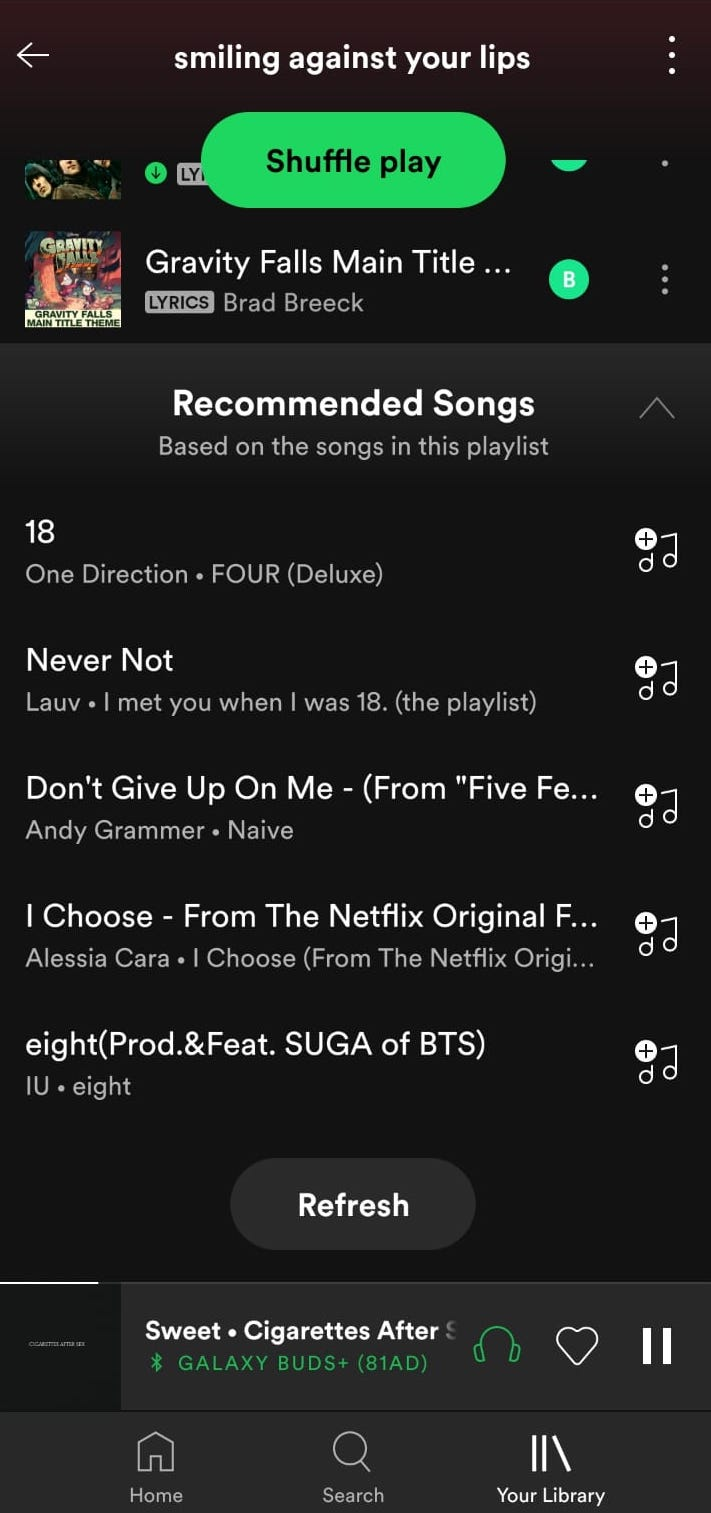

### Takeaways and next steps:
* When factoring in audio features and popularity vs only audio features, the recommender system gives different song suggestions. Maybe because the popularity of a song has a certain weight to it.
* The songs that were recommended are very different from what spotify actually suggests. I mean, I don't hate the songs that popped up lol. The song Save Me is pretty good. I have been listening to it while working on this last part of the project.
* Next step might be to create a recommender system only using genre since some of the audio features are hard for me to understand 100%.

### One last note
* Fun fact: While doing this project I found a lot of resources. But maybe the most interesting one is a Glitch project that let's you play around with the audio features we used for the recommender system. You set the features and it recommends a playlist for you. The link to this site can be found here: https://nelson.glitch.me/#
* Also, here is a link from The Verge that explains this Glitch Project, called Nelson. On this article, the author tries to explain what the audio features mean. https://www.theverge.com/tldr/2018/2/5/16974194/spotify-recommendation-algorithm-playlist-hack-nelson